# Level - 1

## Task - 1

### Import needed libraries

In [43]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

### Loading the data set

In [100]:
df=pd.read_csv(r"Documents\capgemini_dataset.csv")
df

Restaurant ID           Restaurant Name  Country Code              City  \
0           6317637          Le Petit Souffle           162       Makati City   
1           6304287          Izakaya Kikufuji           162       Makati City   
2           6300002    Heat - Edsa Shangri-La           162  Mandaluyong City   
3           6318506                      Ooma           162  Mandaluyong City   
4           6314302               Sambo Kojin           162  Mandaluyong City   
...             ...                       ...           ...               ...   
9546        5915730               Naml۱ Gurme           208         ��stanbul   
9547        5908749              Ceviz A��ac۱           208         ��stanbul   
9548        5915807                     Huqqa           208         ��stanbul   
9549        5916112               A���k Kahve           208         ��stanbul   
9550        5927402  Walter's Coffee Roastery           208         ��stanbul   

                                                Address  \
0     Third Floor, Century City Mall, Kalayaan Avenu...   
1     Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2     Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3     Third Floor, Mega Fashion Hall, SM Megamall, O...   
4     Third Floor, Mega Atrium, SM Megamall, Ortigas...   
...                                                 ...   
9546  Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...   
9547  Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...   
9548  Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...   
9549  Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...   
9550  Cafea��a Mahallesi, Bademalt۱ Sokak, No 21/B, ...   

                                        Locality  \
0      Century City Mall, Poblacion, Makati City   
1     Little Tokyo, Legaspi Village, Makati City   
2     Edsa Shangri-La, Ortigas, Mandaluyong City   
3         SM Megamall, Ortigas, Mandaluyong City   
4         SM Megamall, Ortigas, Mandaluyong City   
...                                          ...   
9546                                    Karak�_y   
9547                                   Ko��uyolu   
9548                                 Kuru�_e��me   
9549                                 Kuru�_e��me   
9550                                        Moda   

                                       Locality Verbose   Longitude  \
0     Century City Mall, Poblacion, Makati City, Mak...  121.027535   
1     Little Tokyo, Legaspi Village, Makati City, Ma...  121.014101   
2     Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...  121.056831   
3     SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.056475   
4     SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.057508   
...                                                 ...         ...   
9546                                Karak�_y, ��stanbul   28.977392   
9547                               Ko��uyolu, ��stanbul   29.041297   
9548                             Kuru�_e��me, ��stanbul   29.034640   
9549                             Kuru�_e��me, ��stanbul   29.036019   
9550                                    Moda, ��stanbul   29.026016   

       Latitude                          Cuisines  ...          Currency  \
0     14.565443        French, Japanese, Desserts  ...  Botswana Pula(P)   
1     14.553708                          Japanese  ...  Botswana Pula(P)   
2     14.581404  Seafood, Asian, Filipino, Indian  ...  Botswana Pula(P)   
3     14.585318                   Japanese, Sushi  ...  Botswana Pula(P)   
4     14.584450                  Japanese, Korean  ...  Botswana Pula(P)   
...         ...                               ...  ...               ...   
9546  41.022793                           Turkish  ...  Turkish Lira(TL)   
9547  41.009847   World Cuisine, Patisserie, Cafe  ...  Turkish Lira(TL)   
9548  41.055817            Italian, World Cuisine  ...  Turkish Lira(TL)   
9549  41.057979                   Restaurant Cafe  ...  Turkish Lira(TL)   
9550  40.9

In [101]:
df.head()

Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM Megamall, Ortigas, Mandaluyong City   
4      SM Megamall, Ortigas, Mandaluyong City   

                                    Locality Verbose   Longitude   Latitude  \
0  Century City Mall, Poblacion, Makati City, Mak...  121.027535  14.565443   
1  Little Tokyo, Legaspi Village, Makati City, Ma...  121.014101  14.553708   
2  Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...  121.056831  14.581404   
3  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.056475  14.585318   
4  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.057508  14.584450   

                           Cuisines  ...          Currency Has Table booking  \
0        French, Japanese, Desserts  ...  Botswana Pula(P)               Yes   
1                          Japanese  ...  Botswana Pula(P)               Yes   
2  Seafood, Asian, Filipino, Indian  ...  Botswana Pula(P)               Yes   
3                   Japanese, Sushi  ...  Botswana Pula(P)                No   
4                  Japanese, Korean  ...  Botswana Pula(P)               Yes   

  Has Online delivery Is delivering now Switch to order menu Price range  \
0                  No                No                   No           3   
1                  No                No                   No           3   
2                  No                No                   No           4   
3                  No                No                   No           4   
4                  No                No                   No           4   

   Aggregate rating  Rating color Rating text Votes  
0               4.8    Dark Green   Excellent   314  
1               4.5    Dark Green   Excellent   591  
2               4.4         Green   Very Good   270  
3               4.9    Dark Green   Excellent   365  
4               4.8    Dark Green   Excellent   229  

[5 rows x 21 columns]

## Task: Data Exploration and Preprocessing

### Explore the dataset and identify the number of rows and columns.

In [102]:
df.columns


Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [103]:
df.shape

(9551, 21)

In [104]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [49]:
df.dtypes


Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
dtype: object

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

### Check for missing values in each column and handle them accordingly.

In [51]:
df.duplicated().sum()

0

In [52]:
df[df.duplicated()]

Empty DataFrame
Columns: [Restaurant ID, Restaurant Name, Country Code, City, Address, Locality, Locality Verbose, Longitude, Latitude, Cuisines, Average Cost for two, Currency, Has Table booking, Has Online delivery, Is delivering now, Switch to order menu, Price range, Aggregate rating, Rating color, Rating text, Votes]
Index: []

[0 rows x 21 columns]

### Perform data type conversion if necessary.Analyze the distribution of the target variable("Aggregate rating") and identify any class imbalances.

In [53]:
df["Aggregate rating"].value_counts()

0.0    2148
3.2     522
3.1     519
3.4     498
3.3     483
3.5     480
3.0     468
3.6     458
3.7     427
3.8     400
2.9     381
3.9     335
2.8     315
4.1     274
4.0     266
2.7     250
4.2     221
2.6     191
4.3     174
4.4     144
2.5     110
4.5      95
2.4      87
4.6      78
4.9      61
2.3      47
4.7      42
2.2      27
4.8      25
2.1      15
2.0       7
1.9       2
1.8       1
Name: Aggregate rating, dtype: int64

In [54]:
df["Rating text"].value_counts()

Average      3737
Not rated    2148
Good         2100
Very Good    1079
Excellent     301
Poor          186
Name: Rating text, dtype: int64

## Task - 2

## Task: Descriptive Analysis

### Calculate basic statistical measures (mean, median, standard deviation, etc.) for numerical columns.

In [55]:
df.describe()

Restaurant ID  Country Code    Longitude     Latitude  \
count   9.551000e+03   9551.000000  9551.000000  9551.000000   
mean    9.051128e+06     18.365616    64.126574    25.854381   
std     8.791521e+06     56.750546    41.467058    11.007935   
min     5.300000e+01      1.000000  -157.948486   -41.330428   
25%     3.019625e+05      1.000000    77.081343    28.478713   
50%     6.004089e+06      1.000000    77.191964    28.570469   
75%     1.835229e+07      1.000000    77.282006    28.642758   
max     1.850065e+07    216.000000   174.832089    55.976980   

       Average Cost for two  Price range  Aggregate rating         Votes  
count           9551.000000  9551.000000       9551.000000   9551.000000  
mean            1199.210763     1.804837          2.666370    156.909748  
std            16121.183073     0.905609          1.516378    430.169145  
min                0.000000     1.000000          0.000000      0.000000  
25%              250.000000     1.000000          2.500000      5.000000  
50%              400.000000     2.000000          3.200000     31.000000  
75%              700.000000     2.000000          3.700000    131.000000  
max           800000.000000     4.000000          4.900000  10934.000000

### Explore the distribution of categorical variables like "Country Code" , "City" , and "Cuisines".

In [56]:
country_freq = df['Country Code'].value_counts()
city_freq = df['City'].value_counts()
df['Cuisines'] = df['Cuisines'].str.split(',')
df = df.explode('Cuisines')
cuisine_freq = df['Cuisines'].value_counts()

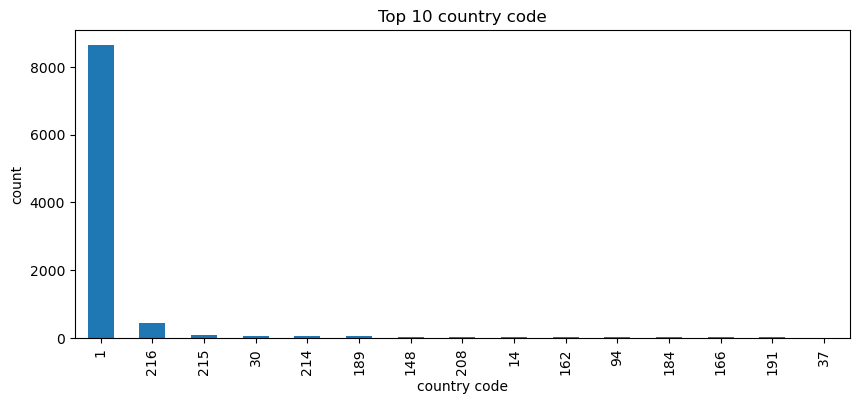

In [57]:
plt.figure(figsize=(10,4))
country_freq.plot(kind="bar")
plt.title("Top 10 country code")
plt.xlabel("country code")
plt.ylabel("count")
plt.show()

In [58]:
y=df["City"].value_counts().head(10)
y

New Delhi    10888
Gurgaon       2393
Noida         2180
Faridabad      499
Jaipur          76
Ahmedabad       76
Mumbai          76
Pretoria        74
Chennai         62
Pune            60
Name: City, dtype: int64

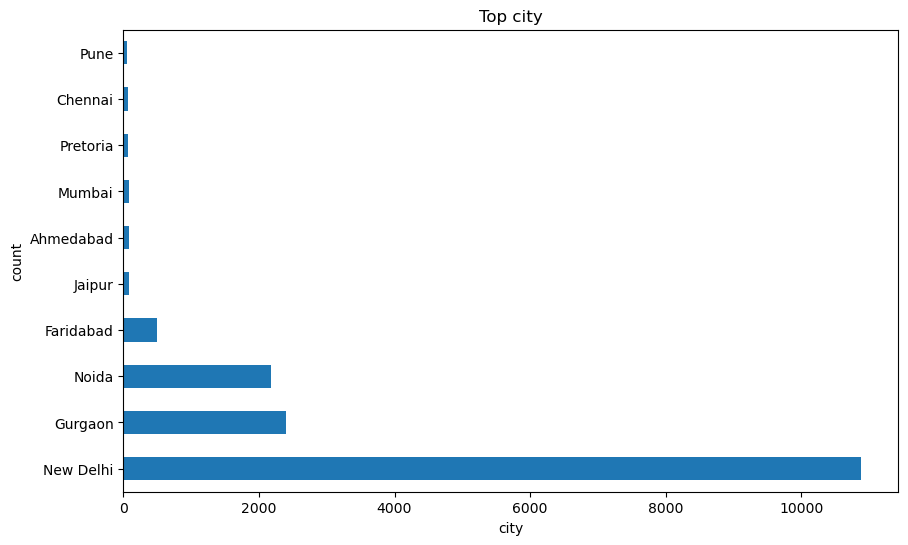

In [59]:
plt.figure(figsize=(10,6))
y.plot(kind="barh")
plt.title("Top city")
plt.xlabel("city")
plt.ylabel("count")
plt.show()

In [60]:
z=df["Cuisines"].value_counts().head(10)
z

North Indian     2992
 Chinese         1880
 Fast Food       1314
 North Indian     968
Chinese           855
 Mughlai          780
Fast Food         672
Bakery            621
Cafe              617
 Italian          530
Name: Cuisines, dtype: int64

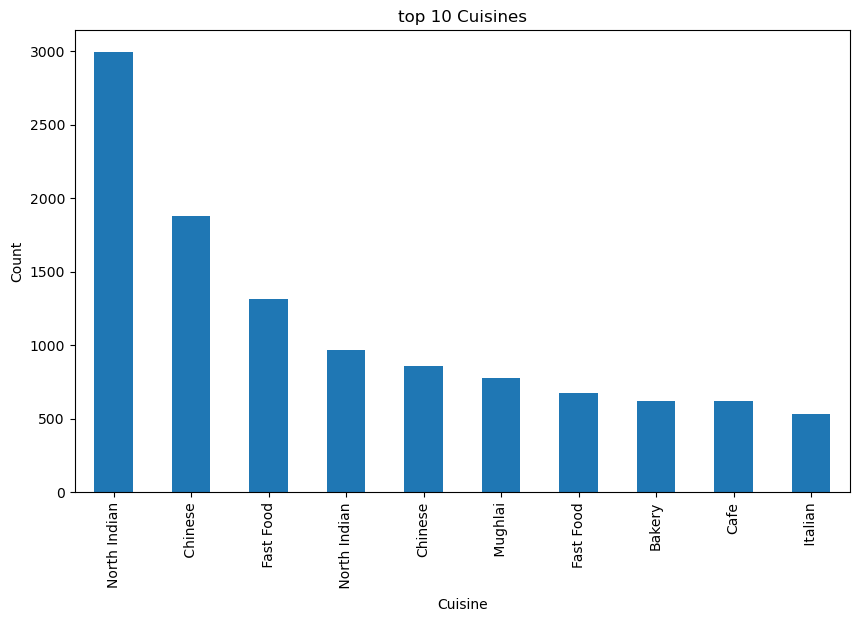

In [61]:
z= df['Cuisines'].str.split(', ', expand=True).stack().value_counts().head(10)
plt.figure(figsize=(10, 6))
z.plot(kind='bar')
plt.title('top 10 Cuisines')
plt.xlabel('Cuisine')
plt.ylabel('Count')
plt.show()

### Identify the top cuisines and cities with the highest number of restaurants.

In [62]:
print("Top 10 cuisines with the highest number of restaurants:")
print(cuisine_freq.head(10))
print("\n")
print("\nTop 10 cities with the highest number of restaurants:")
print(city_freq.head(10))

Top 10 cuisines with the highest number of restaurants:
North Indian     2992
 Chinese         1880
 Fast Food       1314
 North Indian     968
Chinese           855
 Mughlai          780
Fast Food         672
Bakery            621
Cafe              617
 Italian          530
Name: Cuisines, dtype: int64



Top 10 cities with the highest number of restaurants:
New Delhi       5473
Gurgaon         1118
Noida           1080
Faridabad        251
Ghaziabad         25
Bhubaneshwar      21
Amritsar          21
Ahmedabad         21
Lucknow           21
Guwahati          21
Name: City, dtype: int64


## Task - 3

## Task: Geospatial Analysis

### Visualize the locations of restaurants on a map using latitude and longitude information.


Correlation between Latitude, Longitude, and Aggregate rating:


                  Latitude  Longitude  Aggregate rating
Latitude              1.00       0.04             -0.01
Longitude             0.04       1.00             -0.10
Aggregate rating     -0.01      -0.10              1.00




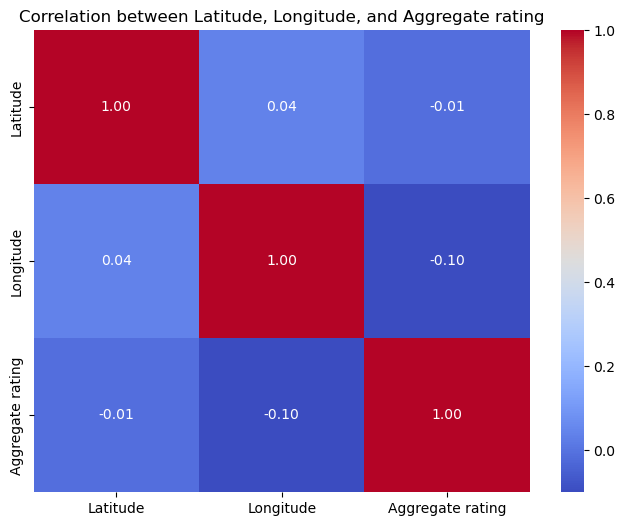

In [63]:

correlation = df[['Latitude', 'Longitude', 'Aggregate rating']].corr().round(2)
print("\nCorrelation between Latitude, Longitude, and Aggregate rating:")
print("\n")
print(correlation)
print("\n")

plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm',fmt="0.2f")
plt.title('Correlation between Latitude, Longitude, and Aggregate rating')
plt.show()

## Determine the percentage of restaurants offering table booking and online delivery

In [64]:
a= (df['Has Table booking'].value_counts(normalize=True) * 100).round(2)
b= (df['Has Online delivery'].value_counts(normalize=True) * 100).round(2)
print("Percentage of restaurants offering table booking:")
print(a)
print("\nPercentage of restaurants offering online delivery:")
print(b)


Percentage of restaurants offering table booking:
No     84.03
Yes    15.97
Name: Has Table booking, dtype: float64

Percentage of restaurants offering online delivery:
No     70.58
Yes    29.42
Name: Has Online delivery, dtype: float64


## Compare the average ratings of restaurants with table booking and those without

In [65]:
c = df[df['Has Table booking'] == 'Yes']['Aggregate rating'].mean()
d = df[df['Has Table booking'] == 'No']['Aggregate rating'].mean()

print("Average rating of restaurants with table booking :", c)
print("\n")
print("Average rating of restaurants without table booking:", d)

Average rating of restaurants with table booking : 3.4976825396825375


Average rating of restaurants without table booking: 2.746508540044668


## Analyze the availability of online deliveryamong restaurants with different price ranges.

In [66]:
e = df['Price range'].unique()
e

array([3, 4, 2, 1], dtype=int64)

In [67]:
for prive_range in e:
    restaurants_in_prive_range = df[df['Price range'] == prive_range]
    online_delivery_percentage = (df['Has Online delivery'].value_counts(normalize=True) * 100).round(2)
    online_delivery_by_price_range = online_delivery_percentage

print("\nOnline delivery availability by price range:")
for price_range, percentage in online_delivery_by_price_range.items():
    print(f"Price Range :" ,price_range)
    print(percentage)




Online delivery availability by price range:
Price Range : No
70.58
Price Range : Yes
29.42


# Level - 2

    

## Task - 1

## Task: Table Booking and Online Delivery

### Determine the percentage of restaurants that offer table booking and online delivery.

In [68]:
f = (df['Has Table booking'].value_counts(normalize=True) * 100).round(2)
g = (df['Has Online delivery'].value_counts(normalize=True) * 100).round(2)
print("Percentage of Restaurants Offering Table Booking:") 
print(f)
print("\n")
print("\nPercentage of Restaurants Offering Online Delivery:")
print(g)

Percentage of Restaurants Offering Table Booking:
No     84.03
Yes    15.97
Name: Has Table booking, dtype: float64



Percentage of Restaurants Offering Online Delivery:
No     70.58
Yes    29.42
Name: Has Online delivery, dtype: float64


### Compare the average ratings of restaurants with table booking and those without.

In [69]:
i = df.loc[df['Has Table booking'] == 'Yes', 'Aggregate rating'].mean()
j = df.loc[df['Has Table booking'] == 'No', 'Aggregate rating'].mean()
print("Average rating of restaurent with table booking : ",i)
print("Average rating of restaurent without table booking : ",j)

Average rating of restaurent with table booking :  3.4976825396825375
Average rating of restaurent without table booking :  2.746508540044668


### Analyze availability of online delivery among restaurants with different price ranges

In [70]:
k = df.groupby('Price range')['Has Online delivery'].value_counts(normalize=True) * 100
k

Price range  Has Online delivery
1            No                     82.526231
             Yes                    17.473769
2            No                     55.264265
             Yes                    44.735735
3            No                     68.944430
             Yes                    31.055570
4            No                     89.719626
             Yes                    10.280374
Name: Has Online delivery, dtype: float64

In [71]:
df['Price range'].value_counts()

1    7434
2    7133
3    3761
4    1391
Name: Price range, dtype: int64

## Task - 2

### Determine the most common price range among all the restaurants.

In [72]:

a = df['Price range'].value_counts()
print(a)
b = a.idxmax()  
c = a.max() 
print(f"The most common price range among all the restaurants is:",b)
print(f"It appears {c} times.")

1    7434
2    7133
3    3761
4    1391
Name: Price range, dtype: int64
The most common price range among all the restaurants is: 1
It appears 7434 times.


### Calculate the average rating for each price range.

In [73]:
x = df.pivot_table(index='Price range', values='Aggregate rating', aggfunc='mean')
print("Average rating for each price range:")
print(x)

Average rating for each price range:
             Aggregate rating
Price range                  
1                    2.124899
2                    3.012253
3                    3.703324
4                    3.819914


### Identify the color that represents the highest average rating among different price ranges.

In [74]:
def col_with_high_avg_rating(df):
    x = df.groupby(['Price range', 'Rating color'])['Aggregate rating'].mean()

    y = x.reset_index()
    z = y['Aggregate rating'].idxmax()
    high_color = y.loc[z, 'Rating color']
    high_price_range = y.loc[z, 'Price range']
    high_rating = y.loc[z, 'Aggregate rating']
    print(f"highest average rating of :",high_rating)
    print('high color :',high_color)
    print("price range :",high_price_range)
    return {
        'Rating color': high_color,
        'price_range': high_price_range,
        'rating': high_rating
    }
result = col_with_high_avg_rating(df)


highest average rating of : 4.689115646258503
high color : Dark Green
price range : 4


## Task - 3

### Extract additional features from the existing columns, such as the length of the restaurant name or address.

In [75]:
def extract_features(df):
    df['Restaurant Name Length'] = df['Restaurant Name'].str.len()
    df['Address Length'] = df['Address'].str.len()
    print("Extracted features:")
    print(df[['Restaurant Name Length', 'Address Length']].head())
    return df
df = extract_features(df)


Extracted features:
   Restaurant Name Length  Address Length
0                      16              71
0                      16              71
0                      16              71
1                      16              67
2                      22              56


### Create new features like "Has Table Booking" or "Has Online Delivery" by encoding categorical variables.

In [76]:
def encode_cat_var(df):
    df['Has Table Booking'] = df['Has Table booking'].apply(lambda x: 1 if x == 'Yes' else 0)
    df['Has Online delivery'] = df['Has Online delivery'].apply(lambda x: 1 if x == 'Yes' else 0)
    print("Encoded features:")
    print(df[['Has Table Booking', 'Has Online delivery']].head())
    return df
df = encode_cat_var(df)


Encoded features:
   Has Table Booking  Has Online delivery
0                  1                    0
0                  1                    0
0                  1                    0
1                  1                    0
2                  1                    0


# Level - 3

## Task - 1

### Build a regression model to predict the aggregate rating of a restaurant based of available features.

In [77]:
def build_regression_model(df):
    features_to_keep = ['Price range', 'Rating color', 'Restaurant Name', 'Address',
                        'Has Table booking', 'Has Online delivery']
    target = 'Aggregate rating'
    df = df.dropna(subset=[target])
    df['Restaurant Name Length'] = df['Restaurant Name'].str.len()
    df['Address Length'] = df['Address'].str.len()
    X = df[features_to_keep + ['Restaurant Name Length', 'Address Length']]
    y = df[target]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    categorical_features = ['Price range', 'Rating color', 'Has Table booking', 'Has Online delivery']
    numerical_features = ['Restaurant Name Length', 'Address Length']
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), numerical_features),
            ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
        ]
    )
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', LinearRegression())
    ])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mse ** 0.5
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print("Model Evaluation:")
    print(f"Root Mean Squared Error: {rmse:.2f}")
    print(f"Mean Absolute Error: {mae:.2f}")
    print(f"R-squared: {r2:.2f}")
    return pipeline
model = build_regression_model(df)


Model Evaluation:
Root Mean Squared Error: 0.19
Mean Absolute Error: 0.14
R-squared: 0.98


In [79]:
df


Restaurant ID           Restaurant Name  Country Code              City  \
0           6317637          Le Petit Souffle           162       Makati City   
0           6317637          Le Petit Souffle           162       Makati City   
0           6317637          Le Petit Souffle           162       Makati City   
1           6304287          Izakaya Kikufuji           162       Makati City   
2           6300002    Heat - Edsa Shangri-La           162  Mandaluyong City   
...             ...                       ...           ...               ...   
9547        5908749              Ceviz A��ac۱           208         ��stanbul   
9548        5915807                     Huqqa           208         ��stanbul   
9548        5915807                     Huqqa           208         ��stanbul   
9549        5916112               A���k Kahve           208         ��stanbul   
9550        5927402  Walter's Coffee Roastery           208         ��stanbul   

                                                Address  \
0     Third Floor, Century City Mall, Kalayaan Avenu...   
0     Third Floor, Century City Mall, Kalayaan Avenu...   
0     Third Floor, Century City Mall, Kalayaan Avenu...   
1     Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2     Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
...                                                 ...   
9547  Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...   
9548  Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...   
9548  Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...   
9549  Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...   
9550  Cafea��a Mahallesi, Bademalt۱ Sokak, No 21/B, ...   

                                        Locality  \
0      Century City Mall, Poblacion, Makati City   
0      Century City Mall, Poblacion, Makati City   
0      Century City Mall, Poblacion, Makati City   
1     Little Tokyo, Legaspi Village, Makati City   
2     Edsa Shangri-La, Ortigas, Mandaluyong City   
...                                          ...   
9547                                   Ko��uyolu   
9548                                 Kuru�_e��me   
9548                                 Kuru�_e��me   
9549                                 Kuru�_e��me   
9550                                        Moda   

                                       Locality Verbose   Longitude  \
0     Century City Mall, Poblacion, Makati City, Mak...  121.027535   
0     Century City Mall, Poblacion, Makati City, Mak...  121.027535   
0     Century City Mall, Poblacion, Makati City, Mak...  121.027535   
1     Little Tokyo, Legaspi Village, Makati City, Ma...  121.014101   
2     Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...  121.056831   
...                                                 ...         ...   
9547                               Ko��uyolu, ��stanbul   29.041297   
9548                             Kuru�_e��me, ��stanbul   29.034640   
9548                             Kuru�_e��me, ��stanbul   29.034640   
9549                             Kuru�_e��me, ��stanbul   29.036019   
9550                                    Moda, ��stanbul   29.026016   

       Latitude         Cuisines  ...  Is delivering now Switch to order menu  \
0     14.565443           French  ...                 No                   No   
0     14.565443         Japanese  ...                 No                   No   
0     14.565443         Desserts  ...                 No                   No   
1     14.553708         Japanese  ...                 No                   No   
2     14.581404          Seafood  ...                 No                   No   
...         ...              ...  ...                ...                  ...   
9547  41.009847             Cafe  ...                 No                   No   
9548  41.055817          Italian  ...                 No                   No   
9548  41.055817    World Cuisine  ...                 No                   No   
9549  41.057979  Restaurant Cafe  ..

### Split the dataset into training and testing sets and evaluate the model's performance using appropriate metrics.

In [80]:
def evaluate_regression_model(df, target_column, test_size=0.2, random_state=42):
    df = df.dropna(subset=[target_column])
    df['Restaurant Name Length'] = df['Restaurant Name'].str.len()
    df['Address Length'] = df['Address'].str.len()
    features_to_use = ['Price range', 'Rating color', 'Restaurant Name Length', 'Address Length',
                       'Has Table booking', 'Has Online delivery']
    X = df[features_to_use]
    y = df[target_column]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    categorical_features = ['Price range', 'Rating color', 'Has Table booking', 'Has Online delivery']
    numerical_features = ['Restaurant Name Length', 'Address Length']
    preprocessor = ColumnTransformer([
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', LinearRegression())
    ])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mse ** 0.5  # Root Mean Squared Error
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print("Model Evaluation:")
    print(f"Root Mean Squared Error: {rmse:.2f}")
    print(f"Mean Absolute Error: {mae:.2f}")
    print(f"R-squared: {r2:.2f}")
    return pipeline, {"RMSE": rmse, "MAE": mae, "R2": r2}
target_column = 'Aggregate rating'
model, metrics = evaluate_regression_model(df, target_column)


Model Evaluation:
Root Mean Squared Error: 0.19
Mean Absolute Error: 0.14
R-squared: 0.98


### Experiment with different algorithms (e.g., linear regression, decision trees, random forest) and compare their performance.

In [81]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

def experiment_with_algorithms(df, target_column, test_size=0.2, random_state=42):
    df = df.dropna(subset=[target_column])
    df['Restaurant Name Length'] = df['Restaurant Name'].str.len()
    df['Address Length'] = df['Address'].str.len()
    features_to_use = ['Price range', 'Rating color', 'Restaurant Name Length', 'Address Length',
                       'Has Table booking', 'Has Online delivery']
    X = df[features_to_use]
    y = df[target_column]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    categorical_features = ['Price range', 'Rating color', 'Has Table booking', 'Has Online delivery']
    numerical_features = ['Restaurant Name Length', 'Address Length']
    
    preprocessor = ColumnTransformer([
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])
    algorithms = {
        'Linear Regression': LinearRegression(),
        'Decision Tree': DecisionTreeRegressor(random_state=random_state),
        'Random Forest': RandomForestRegressor(random_state=random_state)
    }
    model_metrics = {}
    for algorithm_name, model in algorithms.items():
        pipeline = Pipeline([
            ('preprocessor', preprocessor),
            ('regressor', model)
        ])
        pipeline.fit(X_train, y_train)
        y_pred = pipeline.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        rmse = mse ** 0.5  # Root Mean Squared Error
        mae = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        model_metrics[algorithm_name] = {
            'RMSE': rmse,
            'MAE': mae,
            'R2': r2
        }
        print(f"\n{algorithm_name} Performance:")
        print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
        print(f"Mean Absolute Error (MAE): {mae:.2f}")
        print(f"R-squared: {r2:.2f}")
    return model_metrics
target_column = 'Aggregate rating'
model_metrics = experiment_with_algorithms(df, target_column)


Linear Regression Performance:
Root Mean Squared Error (RMSE): 0.19
Mean Absolute Error (MAE): 0.14
R-squared: 0.98

Decision Tree Performance:
Root Mean Squared Error (RMSE): 0.14
Mean Absolute Error (MAE): 0.06
R-squared: 0.99

Random Forest Performance:
Root Mean Squared Error (RMSE): 0.13
Mean Absolute Error (MAE): 0.08
R-squared: 0.99


## Task - 2

### Analyze the relationship between the type of cuisine and the restaurant's rating.

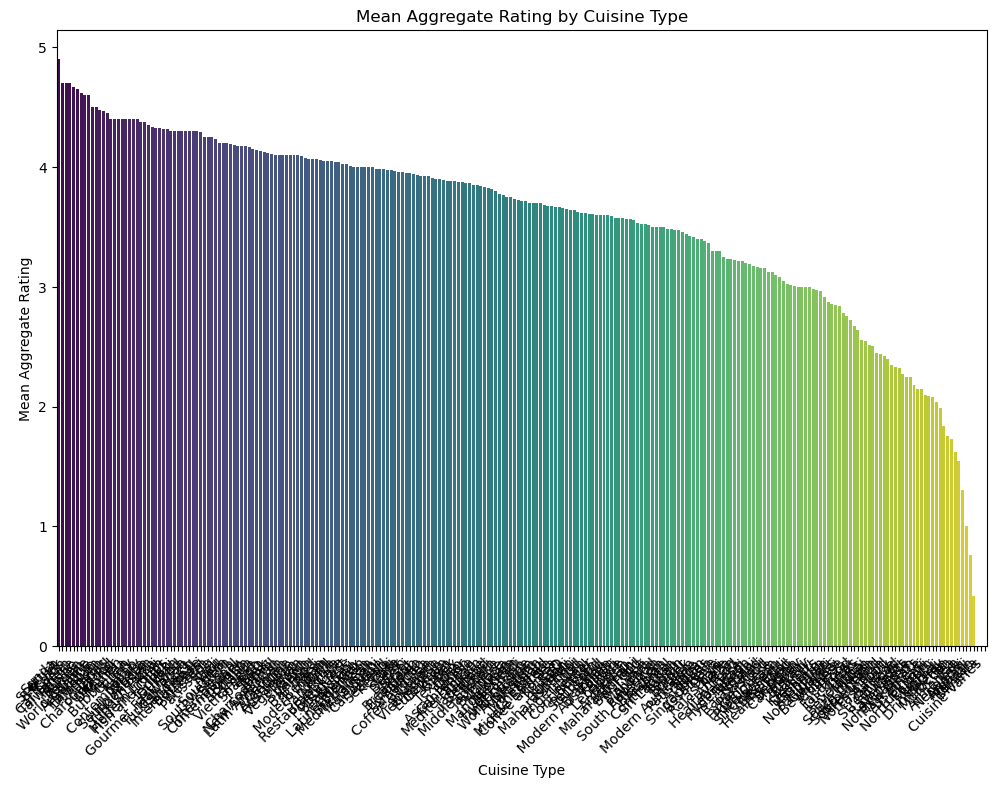

In [82]:
df = df.dropna(subset=['Aggregate rating'])
df['Cuisines'] = df['Cuisines'].str.split(',')
df = df.explode('Cuisines')
cuisine_ratings = df.groupby('Cuisines')['Aggregate rating'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 8))
sns.barplot(x=cuisine_ratings.index, y=cuisine_ratings.values, palette='viridis')
plt.title('Mean Aggregate Rating by Cuisine Type')
plt.xlabel('Cuisine Type')
plt.ylabel('Mean Aggregate Rating')
plt.xticks(rotation=45, ha='right')
plt.show()

### Identify the most popular cuisines among customers based on the number of votes.

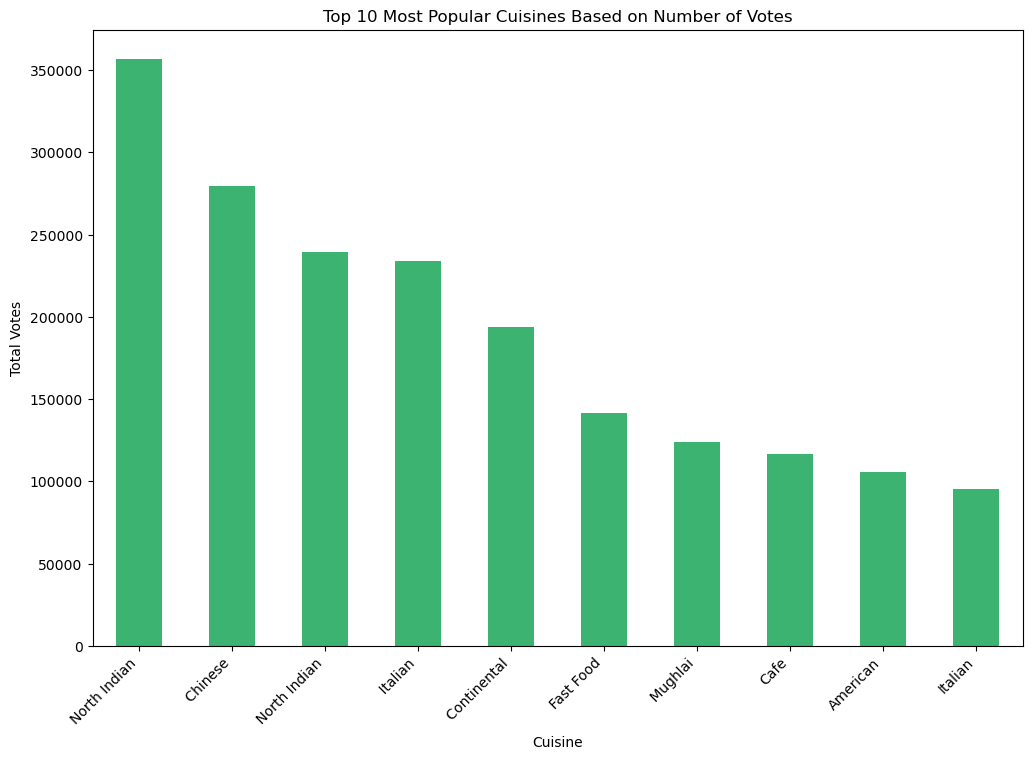

Top 10 most popular cuisines based on the number of votes:
Cuisines
North Indian     356684
 Chinese         279433
 North Indian    239297
 Italian         234112
 Continental     193686
 Fast Food       141441
 Mughlai         124081
Cafe             116576
American         105447
Italian           95153
Name: Votes, dtype: int64


In [83]:
df = df.dropna(subset=['Votes'])
df['Cuisines'] = df['Cuisines'].str.split(',')
df = df.explode('Cuisines')  
cuisine_votes = df.groupby('Cuisines')['Votes'].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 8))
cuisine_votes.head(10).plot(kind='bar', color='mediumseagreen')
plt.title('Top 10 Most Popular Cuisines Based on Number of Votes')
plt.xlabel('Cuisine')
plt.ylabel('Total Votes')
plt.xticks(rotation=45, ha='right')
plt.show()
print("Top 10 most popular cuisines based on the number of votes:")
print(cuisine_votes.head(10))

### Determine if there are any specific cuisines that tend to receive higher ratings.

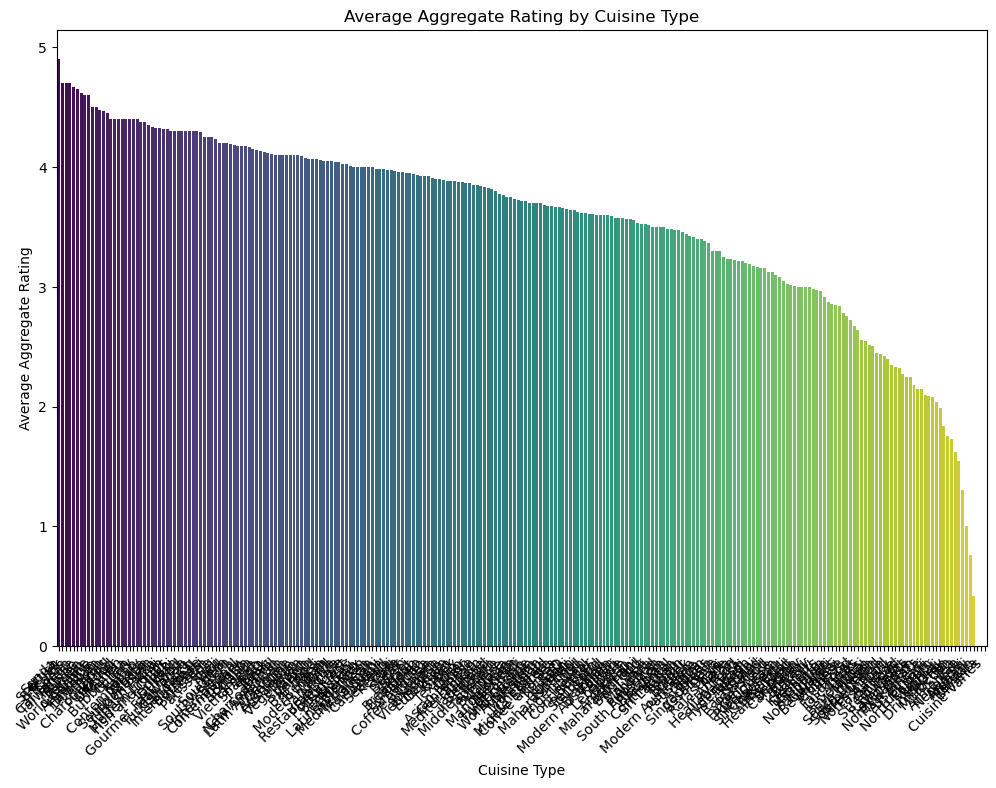

Top 10 cuisines with the highest mean ratings:
Cuisines
Sunda            4.900000
Scottish         4.700000
 B�_rek          4.700000
Cajun            4.700000
 Caribbean       4.666667
Taiwanese        4.650000
Filipino         4.616667
Ramen            4.600000
Persian          4.600000
World Cuisine    4.500000
Name: Aggregate rating, dtype: float64


In [105]:
df = df.dropna(subset=['Aggregate rating'])
df['Cuisines'] = df['Cuisines'].str.split(',')
df = df.explode('Cuisines')
cuisine_ratings = df.groupby('Cuisines')['Aggregate rating'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 8))
sns.barplot(x=cuisine_ratings.index, y=cuisine_ratings.values, palette='viridis')
plt.title('Average Aggregate Rating by Cuisine Type')
plt.xlabel('Cuisine Type')
plt.ylabel('Average Aggregate Rating')
plt.xticks(rotation=45, ha='right')
plt.show()
print("Top 10 cuisines with the highest mean ratings:")
print(cuisine_mean_ratings.head(10))

## Task - 3

### Create visualizations to represent the distribution of ratings using different charts (histogram, bar plot, etc.).

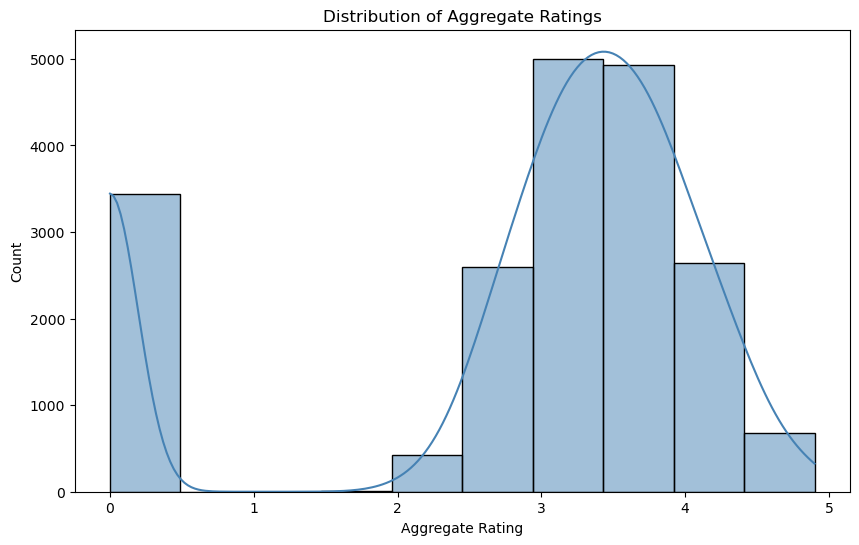

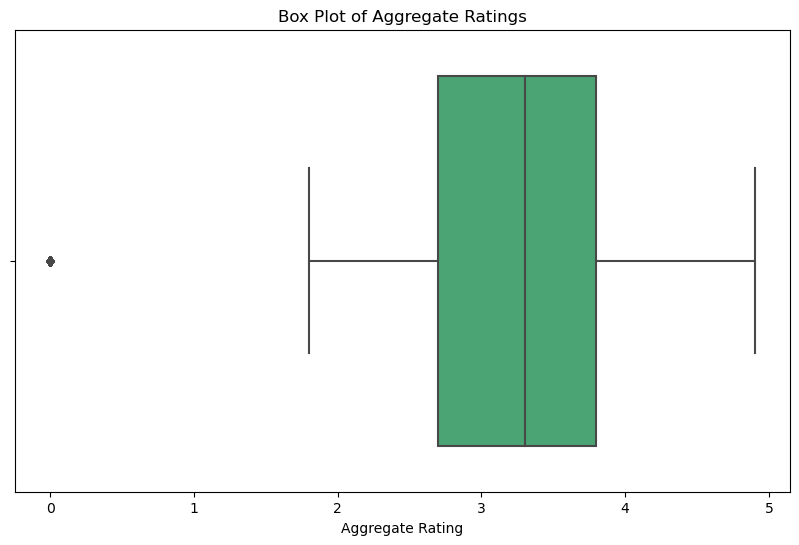

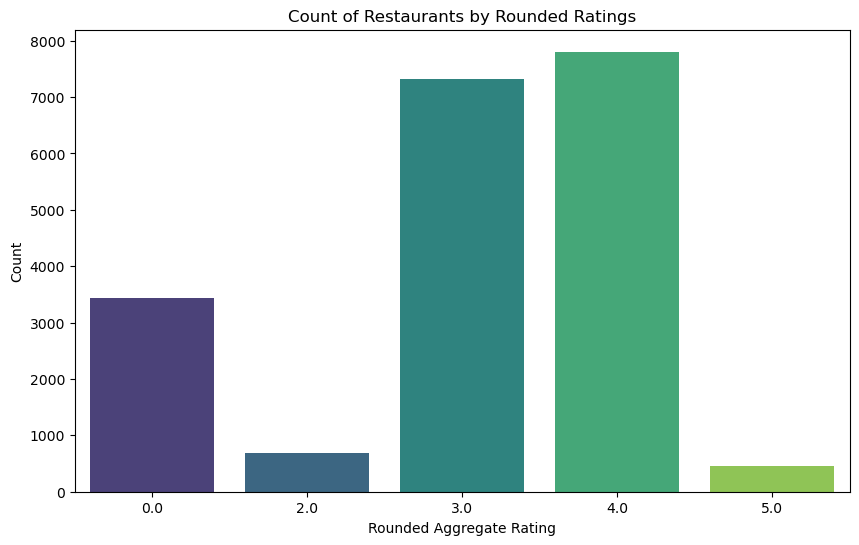

In [85]:
df = df.dropna(subset=['Aggregate rating'])
plt.figure(figsize=(10, 6))
sns.histplot(df['Aggregate rating'], bins=10, kde=True, color='steelblue')
plt.title('Distribution of Aggregate Ratings')
plt.xlabel('Aggregate Rating')
plt.ylabel('Count')
plt.show()
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Aggregate rating'], color='mediumseagreen')
plt.title('Box Plot of Aggregate Ratings')
plt.xlabel('Aggregate Rating')
plt.show()
df['Rounded Rating'] = df['Aggregate rating'].round()

plt.figure(figsize=(10, 6))
sns.countplot(x='Rounded Rating', data=df, palette='viridis')
plt.title('Count of Restaurants by Rounded Ratings')
plt.xlabel('Rounded Aggregate Rating')
plt.ylabel('Count')
plt.show()

### Compare the average ratings of different cuisines or cities using appropriate visualizations.

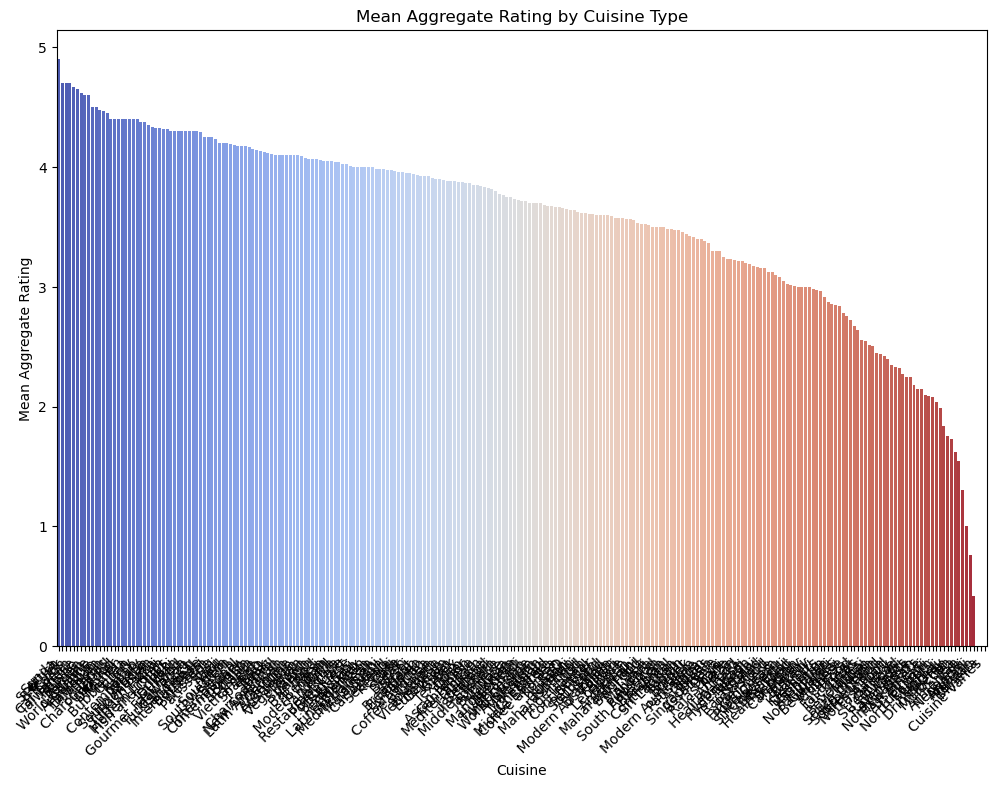

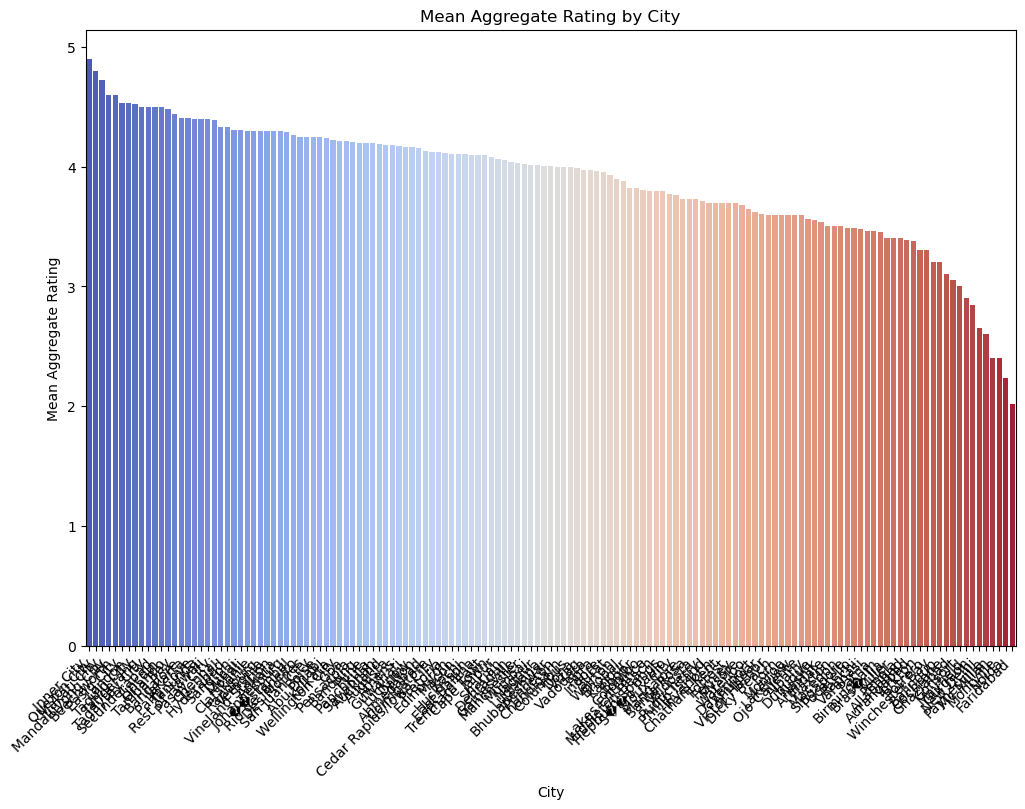

Top 10 cuisines with the highest mean ratings:
Cuisines
Sunda            4.900000
Scottish         4.700000
 B�_rek          4.700000
Cajun            4.700000
 Caribbean       4.666667
Taiwanese        4.650000
Filipino         4.616667
Ramen            4.600000
Persian          4.600000
World Cuisine    4.500000
Name: Aggregate rating, dtype: float64

Top 10 cities with the highest mean ratings:
City
Inner City          4.900000
Quezon City         4.800000
Makati City         4.725000
Mandaluyong City    4.600000
Beechworth          4.600000
Pasig City          4.533333
London              4.530769
Taguig City         4.526667
Tangerang           4.500000
Tagaytay City       4.500000
Name: Aggregate rating, dtype: float64


In [86]:
df = df.dropna(subset=['Aggregate rating'])
df['Cuisines'] = df['Cuisines'].str.split(',')
df = df.explode('Cuisines') 
cuisine_mean_ratings = df.groupby('Cuisines')['Aggregate rating'].mean().sort_values(ascending=False)
city_mean_ratings = df.groupby('City')['Aggregate rating'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 8))
sns.barplot(x=cuisine_mean_ratings.index, y=cuisine_mean_ratings.values, palette='coolwarm')
plt.title('Mean Aggregate Rating by Cuisine Type')
plt.xlabel('Cuisine')
plt.ylabel('Mean Aggregate Rating')
plt.xticks(rotation=45, ha='right')
plt.show()
plt.figure(figsize=(12, 8))
sns.barplot(x=city_mean_ratings.index, y=city_mean_ratings.values, palette='coolwarm')
plt.title('Mean Aggregate Rating by City')
plt.xlabel('City')
plt.ylabel('Mean Aggregate Rating')
plt.xticks(rotation=45, ha='right')
plt.show()
print("Top 10 cuisines with the highest mean ratings:")
print(cuisine_mean_ratings.head(10))

print("\nTop 10 cities with the highest mean ratings:")
print(city_mean_ratings.head(10))

### Visualize the relationship between various features and the target variable to gain insights.

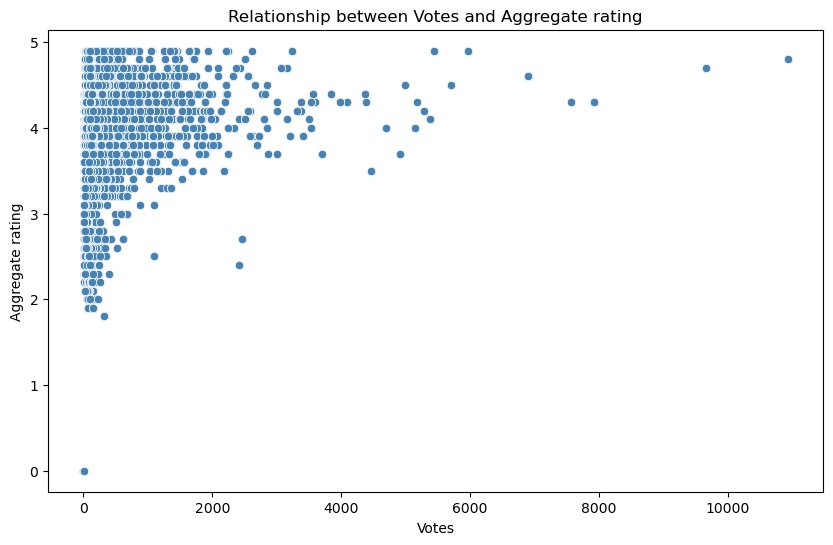

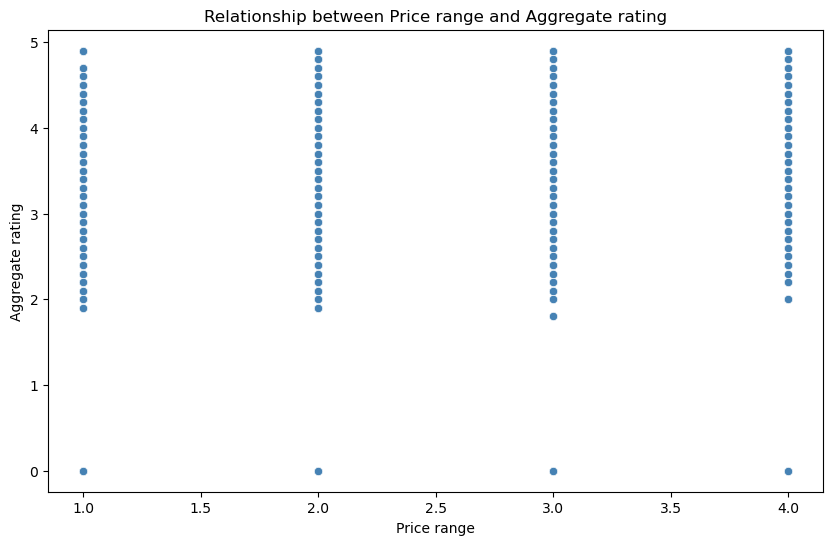

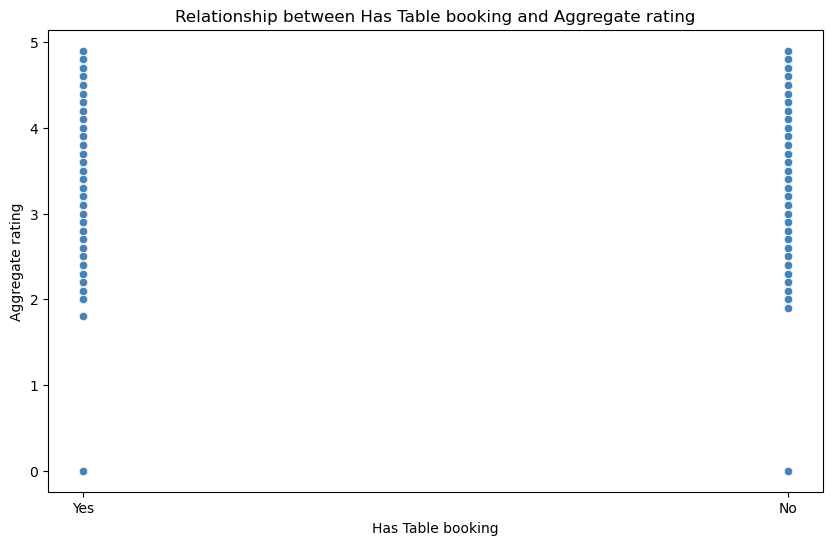

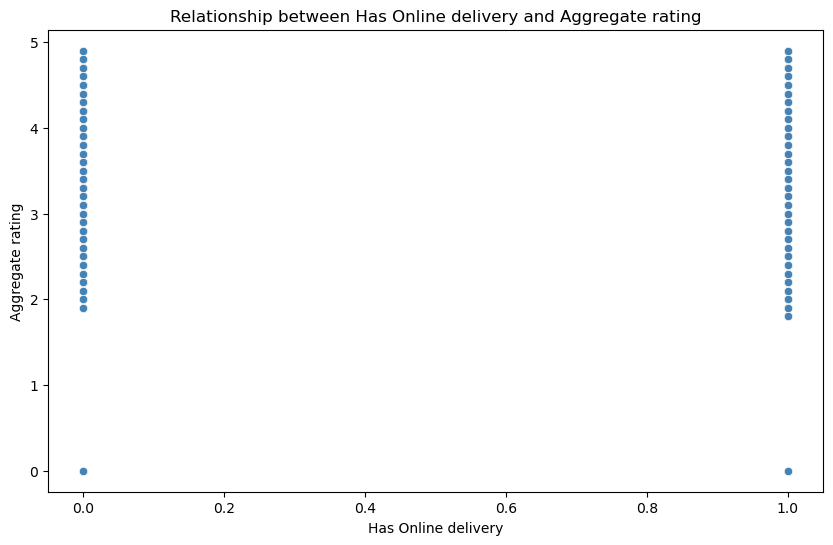

ValueError: Could not interpret input 'City'

<Figure size 1200x800 with 0 Axes>

In [87]:

df = pd.get_dummies(df, columns=['City', 'Cuisines'], drop_first=True)
target = 'Aggregate rating'
features = ['Votes', 'Price range', 'Has Table booking', 'Has Online delivery']
for feature in features:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=df[feature], y=df[target], color='steelblue')
    plt.title(f'Relationship between {feature} and {target}')
    plt.xlabel(feature)
    plt.ylabel(target)
    plt.show()
categorical_features = ['City', 'Cuisines']
for feature in categorical_features:
    plt.figure(figsize=(12, 8))
    sns.boxplot(x=feature, y=target, data=df, palette='coolwarm')
    plt.title(f'Aggregate Rating by {feature}')
    plt.xlabel(feature)
    plt.ylabel('Aggregate Rating')
    plt.xticks(rotation=45, ha='right')
    plt.show()
sns.pairplot(df, vars=features + [target], diag_kind='kde')
plt.show()